# **TOXIC COMMENT IDENTIFICATION MODEL BASED ON NLP**

### **IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np

import pandas as pd

import scipy

import matplotlib.pyplot as plt

import seaborn as sns

import re

from wordcloud import WordCloud, STOPWORDS

import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.stem import SnowballStemmer, PorterStemmer

import math

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error

from sklearn.linear_model import LinearRegression, SGDRegressor

#from sklearn.svm import SVR

#from sklearn.tree import DecisionTreeRegressor

#from sklearn.ensemble import RandomForestRegressor

import gensim

import string

import tensorflow as tf

import keras

from keras.layers import Embedding

import warnings

import collections

from sklearn.metrics import confusion_matrix, classification_report

warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Unzipping the dataset:**

**Link to the dataset:**
https://figshare.com/articles/dataset/data_json/7376747

In [ ]:
#!unzip "/content/drive/MyDrive/6thsemminiproject/jigsaw-unintended-bias-in-toxicity-classification.zip" -d "/content/drive/MyDrive/6thsemminiproject/dataset"

## **Importing Dataset**

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/6thsemminiproject/dataset/train.csv', index_col='id', engine='python')
train_df.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
id,,,,,,,,,,,,,,,,,,,,,
59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [ ]:
train_df

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
id,,,,,,,,,,,,,,,,,,,,,
59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/6thsemminiproject/dataset/test.csv', index_col='id', engine='python')
test_df.head()

,comment_text
id,
7097320,[ Integrity means that you pay your debts.]\n\...
7097321,This is malfeasance by the Administrator and t...
7097322,@Rmiller101 - Spoken like a true elitist. But ...
7097323,"Paul: Thank you for your kind words. I do, in..."
7097324,Sorry you missed high school. Eisenhower sent ...


In [ ]:
train_df.describe()

,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,0.034393,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,0.167900,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1804874 entries, 59848 to 6334010
Data columns (total 44 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   target                               float64
 1   comment_text                         object 
 2   severe_toxicity                      float64
 3   obscene                              float64
 4   identity_attack                      float64
 5   insult                               float64
 6   threat                               float64
 7   asian                                float64
 8   atheist                              float64
 9   bisexual                             float64
 10  black                                float64
 11  buddhist                             float64
 12  christian                            float64
 13  female                               float64
 14  heterosexual                         float64
 15  hindu                       

# **Exploratory Data Analysis:**

### **Checking null values:**

In [ ]:
train_df.isnull().sum()

target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male                                   1399744
muslim       

### **Number of samples in Train_df and Test_df:**

In [ ]:
print("Train and test shape: {} {}".format(train_df.shape, test_df.shape))

Train and test shape: (1804874, 44) (97320, 1)


### **Target value distribution:**

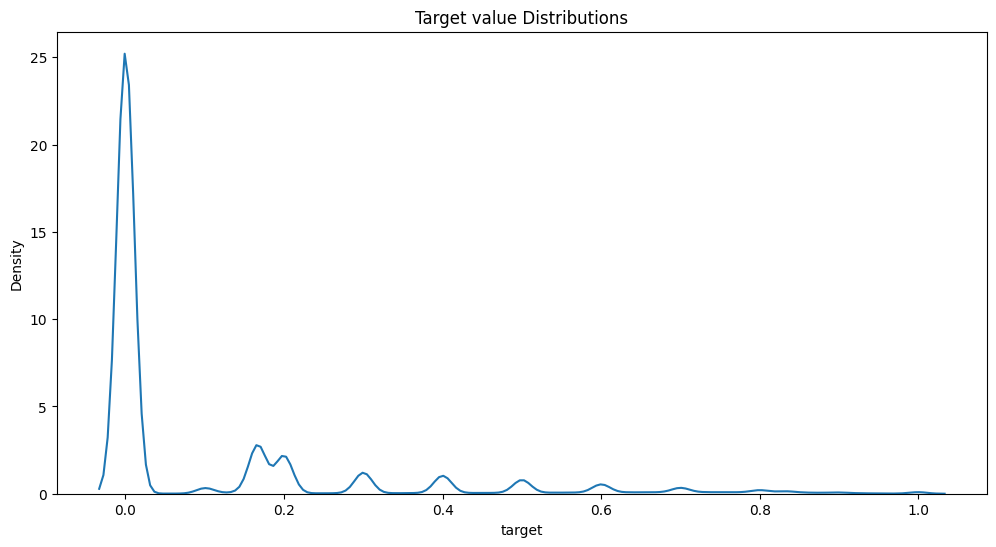

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Target value Distributions")
sns.distplot(train_df['target'], kde=True, hist=False, bins=240, label='target')
plt.show()

**We see that most of the comments present in the dataset are actually non-toxic (<0.5) and only a few of them are actually toxic (>0.5)**

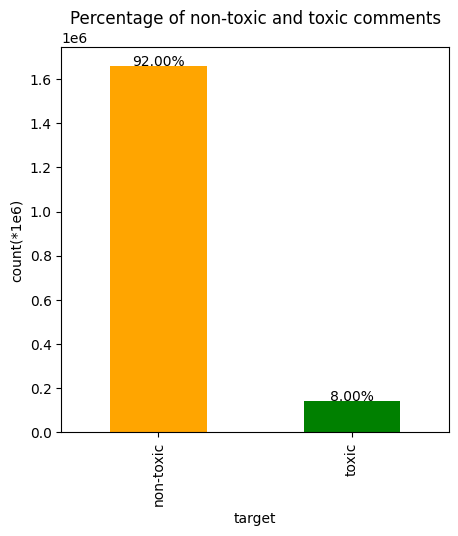

In [ ]:
# If toxicity rating < 0.5 then the comment is non-toxic else it is toxic.
# Get toxic and non-toxic comments.
temp = train_df['target'].apply(lambda x: "non-toxic" if x < 0.5 else "toxic")

# Plot the number and percentage of toxic and non-toxic comments.
fig, ax = plt.subplots(1,1,figsize=(5,5))
total = float(len(temp))

# Plot the count plot.
temp.value_counts().plot.bar(color = ['orange','green'])
plt.title('Percentage of non-toxic and toxic comments')
plt.ylabel('count(*1e6)')
plt.xlabel('target')

# Get the height and calculate percentage then display it the plot itself.
for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')

plt.show()

**The dataset is imbalanced as 92% of the comments are non-toxic and only 8% are toxic**

### **Toxicity Subtype Distribution**

In [ ]:
def plot_features_distribution(features, title, data):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        sns.distplot(data[feature],kde=True,hist=False, bins=240, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

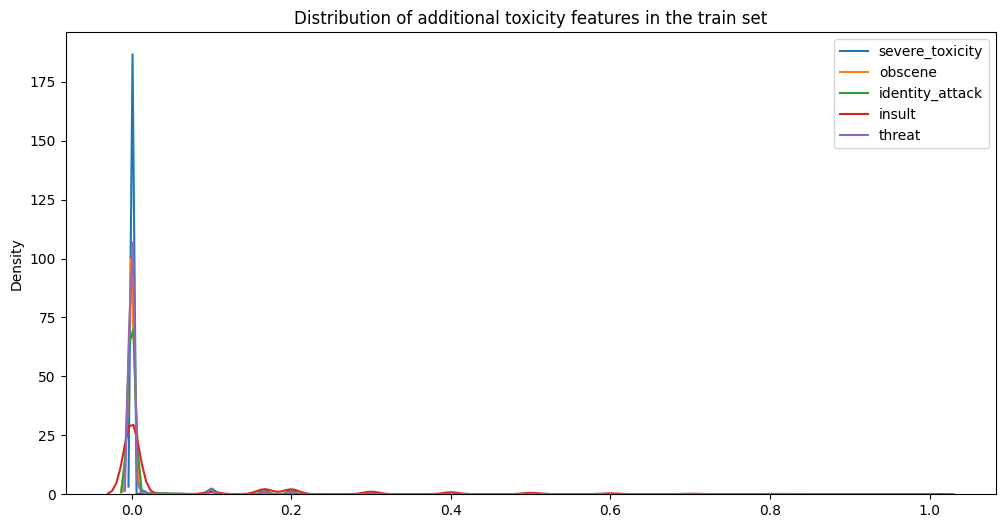

In [ ]:
features = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']
plot_features_distribution(features, "Distribution of additional toxicity features in the train set", train_df)

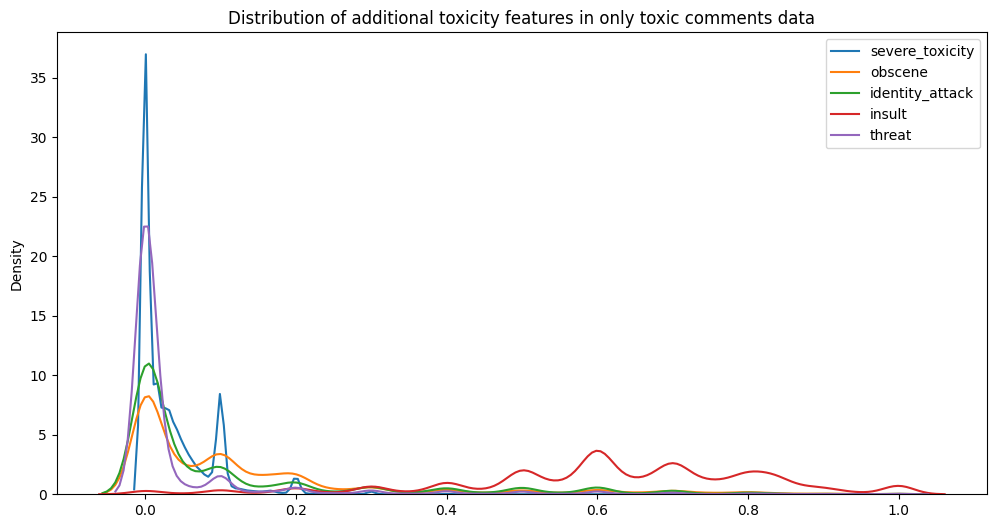

In [ ]:
# Looking at the distribution of additional toxicity features on the comments that are actually considered toxic:
temp = train_df[train_df['target'] > 0.5]
plot_features_distribution(features, "Distribution of additional toxicity features in only toxic comments data", temp)

**We see that for toxic comments data, there are more insulting comments as compared to obscene comments**

### **Calculating percentage of subtypes of toxic comments:**

In [ ]:
# Getting the count of additonal toxicity features in toxic comments data(temp):
def get_comment_nature(row):
    # Extract type of toxic comment
    row = [row['severe_toxicity'], row['obscene'], row['identity_attack'], row['insult'], row['threat']]

    maxarg = np.argmax(np.array(row)) # Get the max value index.

    if maxarg == 0: return 'severe_toxicity'
    elif maxarg == 1: return 'obscene'
    elif maxarg == 2: return 'identity_attack'
    elif maxarg == 3: return 'insult'
    else: return 'threat'

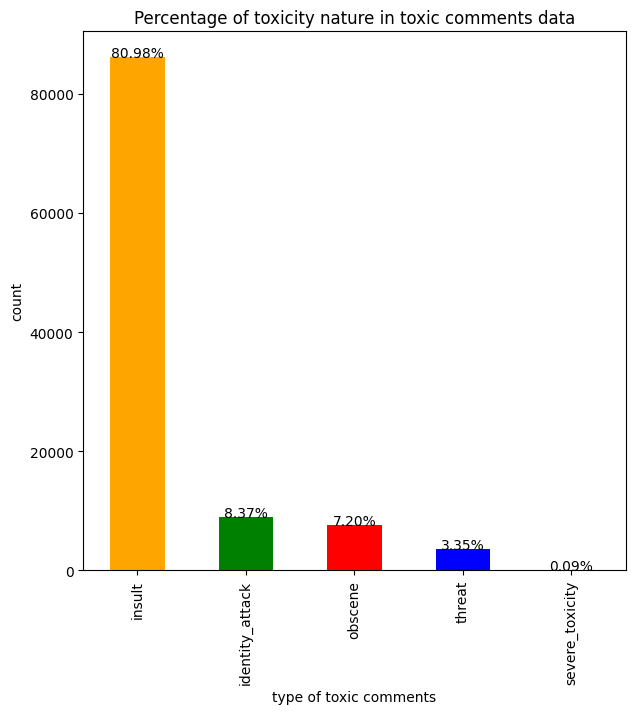

In [ ]:
x = temp.apply(get_comment_nature, axis=1) # Get nature of each toxic comment
fig, ax = plt.subplots(1,1,figsize=(7,7))
total = float(len(x))

# Plot the count plot.
x.value_counts().plot.bar(color = ['orange','green','red','blue','yellow'])
plt.title('Percentage of toxicity nature in toxic comments data')
plt.ylabel('count')
plt.xlabel('type of toxic comments')

# Get the height and calculate percentage then display it the plot itself.
for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')

plt.show()

**In our train dataset only 8% of the data was toxic. Out of that 8%, 81% of the toxic comments made are insults, 8.37% are identity attacks, 7.20% are obscene, 3.35% are threats and a very small amount of toxic comments are severly toxic.**

## **Distribution of Identity Attributes:**

### **Temporarily dropping rows with any null values:**

In [ ]:
temp = train_df.dropna(axis = 0, how = 'any')

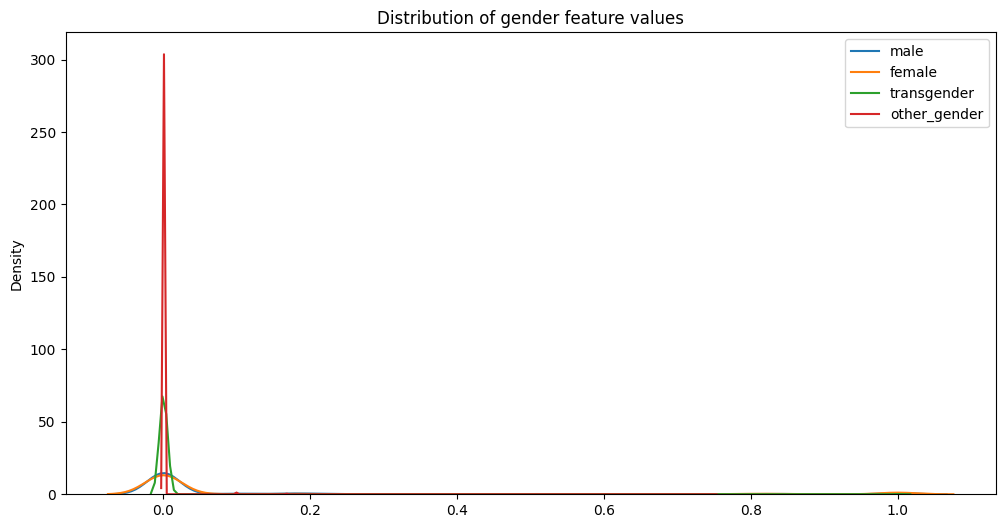

In [ ]:
features = ['male', 'female', 'transgender', 'other_gender']
plot_features_distribution(features, "Distribution of gender feature values", temp)

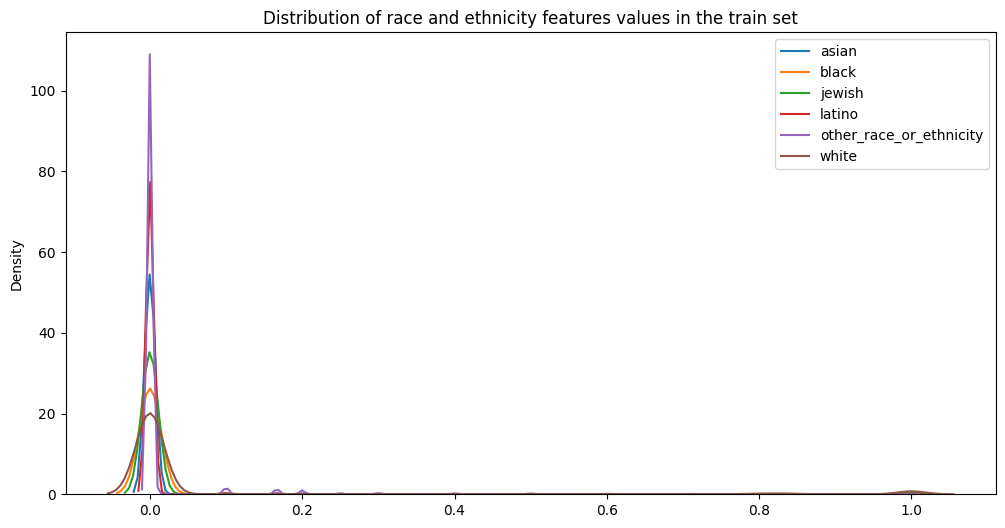

In [ ]:
features = ['asian', 'black', 'jewish', 'latino', 'other_race_or_ethnicity', 'white']
plot_features_distribution(features, "Distribution of race and ethnicity features values in the train set", temp)

### **% of type of toxicity in comments with race/ethnic references**

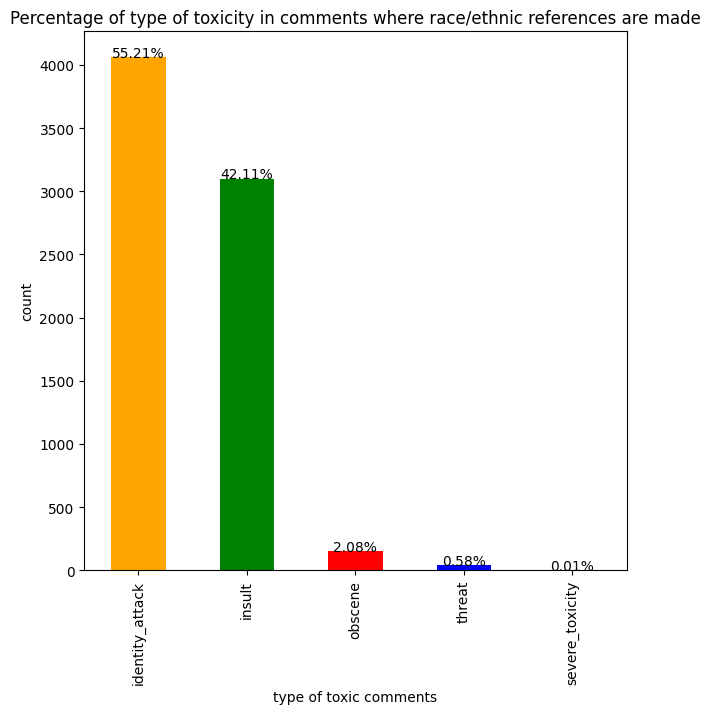

In [ ]:
# Get data where race/ethnic references are made.
cond = (train_df['asian'] > 0.5) | (train_df['black'] > 0.5) | (train_df['jewish'] > 0.5) | (train_df['latino'] > 0.5) | (train_df['white'] > 0.5)
temp = train_df[cond] # Get data where race/ethnic references are made.
temp = temp[temp['target'] > 0.5] # Extract only toxic comments.

x = temp.apply(get_comment_nature, axis=1) # Get nature of each toxic comment

fig, ax = plt.subplots(1,1,figsize=(7,7))
total = float(len(x))

# Plot the count plot.
x.value_counts().plot.bar(color = ['orange','green','red','blue','yellow'])
plt.title('Percentage of type of toxicity in comments where race/ethnic references are made')
plt.ylabel('count')
plt.xlabel('type of toxic comments')

# Get the height and calculate percentage then display it the plot itself.
for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')

plt.show()


###**Get info of data with Sexual orientation references**

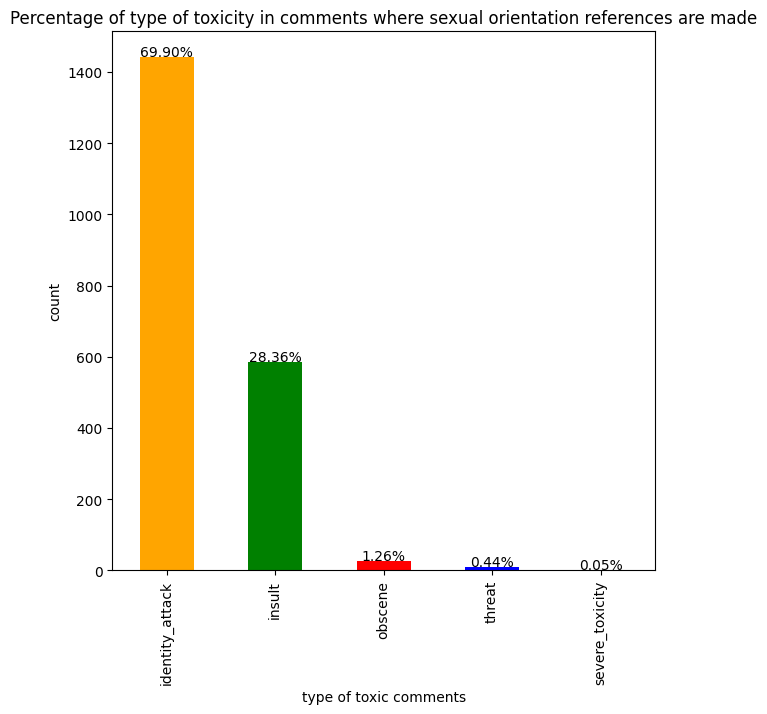

In [ ]:
# Get data where Sexual orientation references are made.
cond = (train_df['bisexual'] > 0.5) | (train_df['heterosexual'] > 0.5) | (train_df['homosexual_gay_or_lesbian'] > 0.5) | (train_df['other_sexual_orientation'] > 0.5)
temp = train_df[cond] #  Get data where Sexual orientation references are made.
temp = temp[temp['target'] > 0.5] # Extract only toxic comments.

x = temp.apply(get_comment_nature, axis=1) # Get nature of each toxic comment

fig, ax = plt.subplots(1,1,figsize=(7,7))
total = float(len(x))

# Plot the count plot.
x.value_counts().plot.bar(color = ['orange','green','red','blue','yellow'])
plt.title('Percentage of type of toxicity in comments where sexual orientation references are made')
plt.ylabel('count')
plt.xlabel('type of toxic comments')

# Get the height and calculate percentage then display it the plot itself.
for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')

plt.show()

### **Get info of data with gender references**

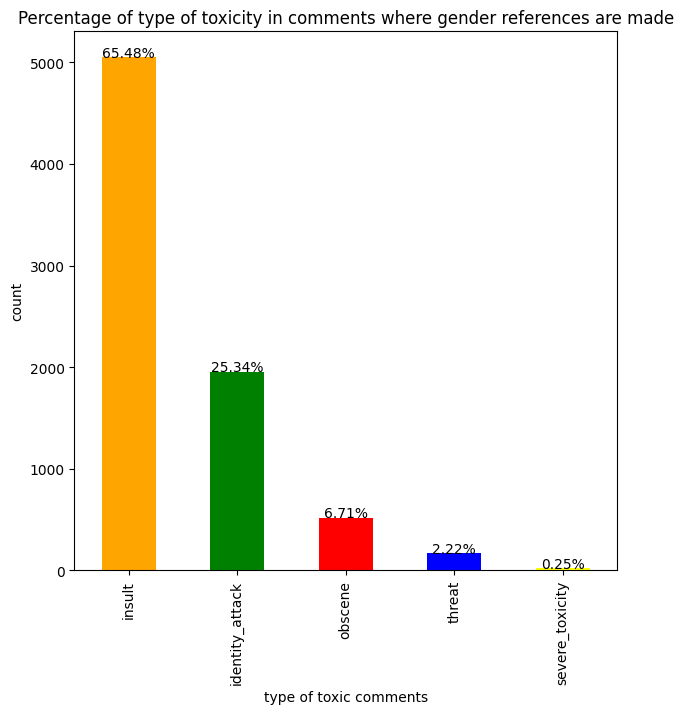

In [ ]:
# Get data where gender references are made.
cond = (train_df['male'] > 0.5) | (train_df['female'] > 0.5) | (train_df['transgender'] > 0.5) | (train_df['other_gender'] > 0.5)
temp = train_df[cond] #  Get data where gender references are made
temp = temp[temp['target'] > 0.5] # Extract only toxic comments.

x = temp.apply(get_comment_nature, axis=1) # Get nature of each toxic comment

fig, ax = plt.subplots(1,1,figsize=(7,7))
total = float(len(x))

# Plot the count plot.
x.value_counts().plot.bar(color = ['orange','green','red','blue','yellow'])
plt.title('Percentage of type of toxicity in comments where gender references are made')
plt.ylabel('count')
plt.xlabel('type of toxic comments')

# Get the height and calculate percentage then display it the plot itself.
for p in ax.patches:
    # Get height.
    height = p.get_height()
    # Plot at appropriate position.
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')

plt.show()

### **Features generated by users feedback**

In [ ]:

def plot_count(feature, title, data, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(data))
    data[feature].value_counts().nlargest(n=20).plot.bar(color = ['orange','green','red','blue','yellow'])
    plt.title("Number and percentage of {}".format(title))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
    plt.show()

In [ ]:
print(len(train_df['funny'].unique()))
train_df['funny'].unique()

61


array([  0,   1,   2,   4,   3,   5,  10,   6,   7,   9,  16,  12,   8,
        14,  23,  15,  11,  13,  17,  19,  18,  24,  26,  34,  28,  40,
        30,  25,  39,  31,  27,  21,  22,  20,  33,  38,  35,  52,  43,
        32,  29, 102,  50,  36,  94,  37,  45,  42,  58,  47,  44,  48,
        49,  46,  51,  93,  95,  61,  73,  54,  41])

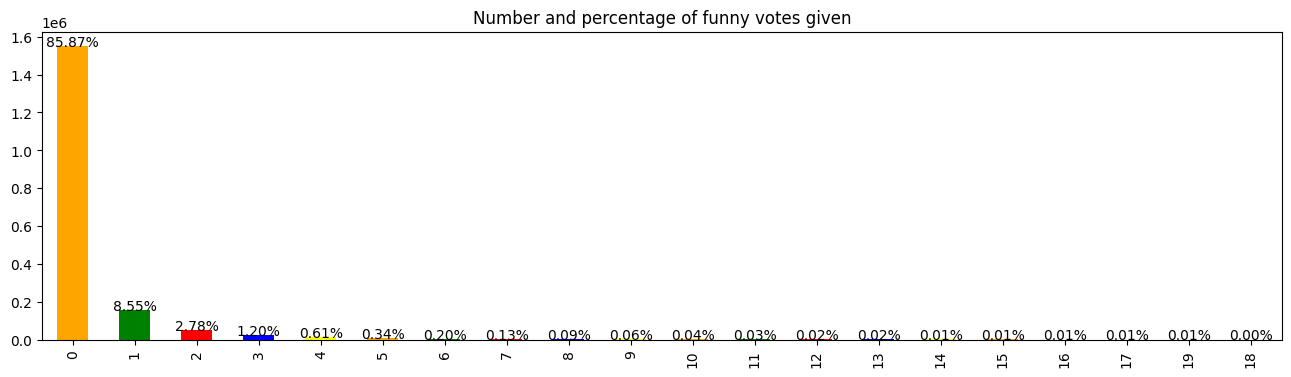

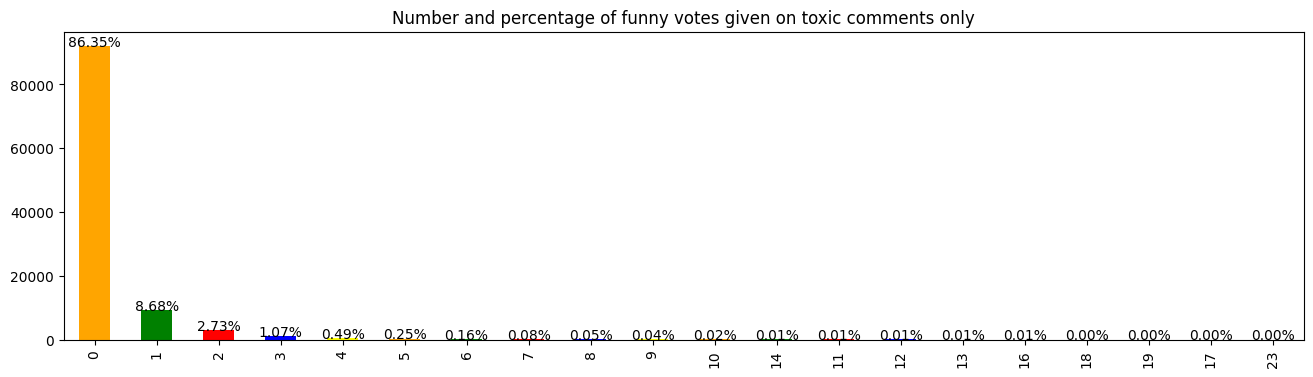

In [ ]:
plot_count('funny','funny votes given', train_df, 4)
plot_count('funny', 'funny votes given on toxic comments only', train_df[train_df['target'] > 0.5], 4)

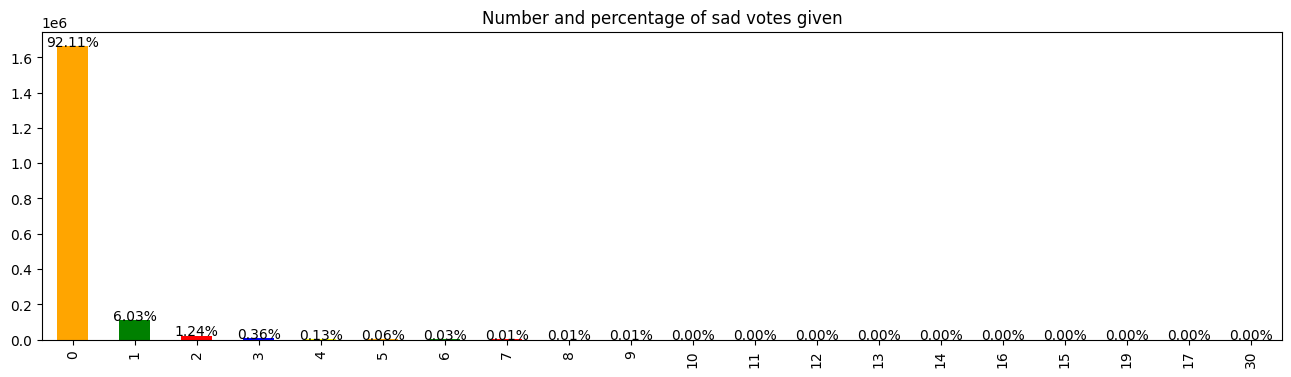

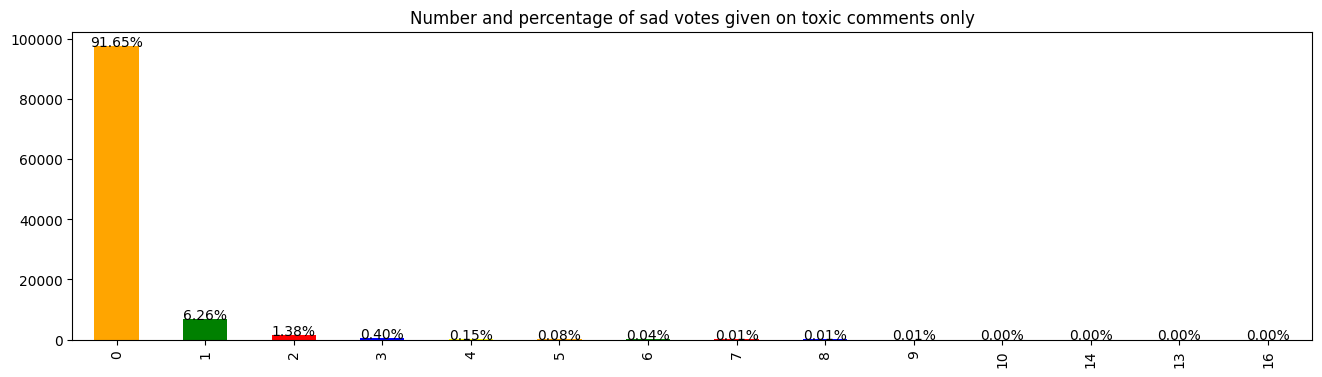

In [ ]:
plot_count('sad','sad votes given', train_df, 4)
plot_count('sad', 'sad votes given on toxic comments only', train_df[train_df['target'] > 0.5], 4)

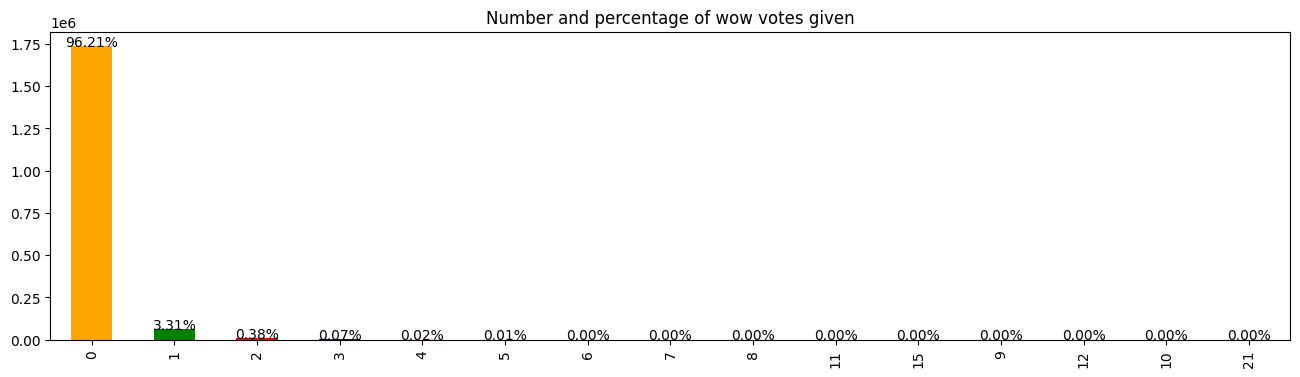

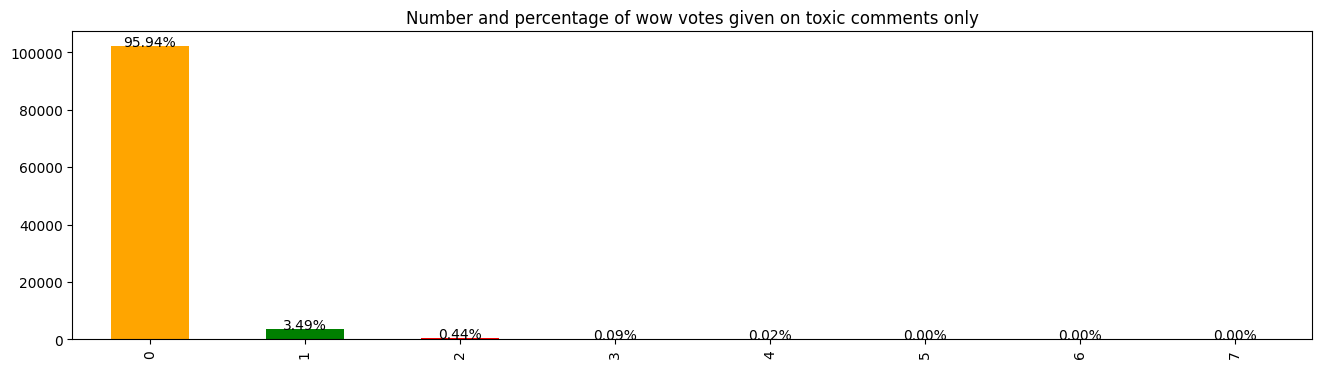

In [ ]:
plot_count('wow','wow votes given', train_df, 4)
plot_count('wow', 'wow votes given on toxic comments only', train_df[train_df['target'] > 0.5], 4)

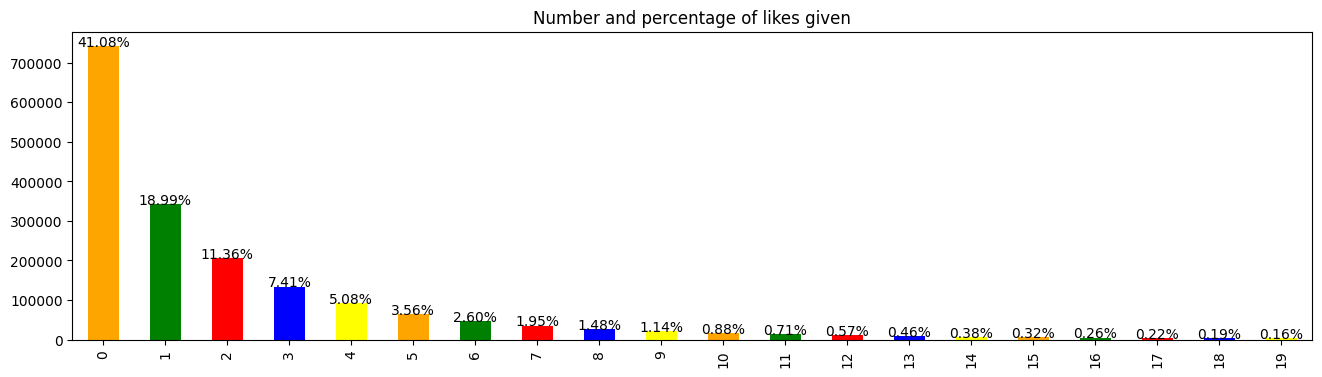

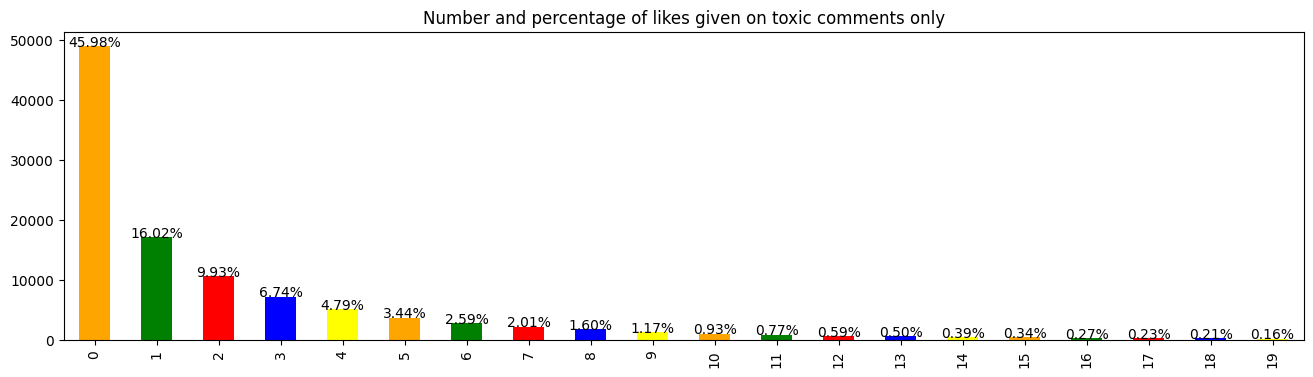

In [ ]:
plot_count('likes','likes given', train_df, 4)
plot_count('likes', 'likes given on toxic comments only', train_df[train_df['target'] > 0.5], 4)

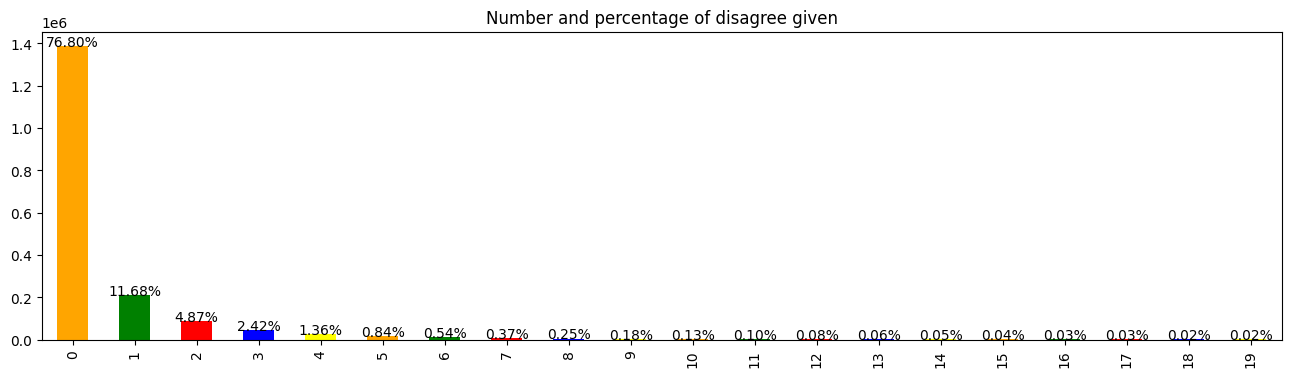

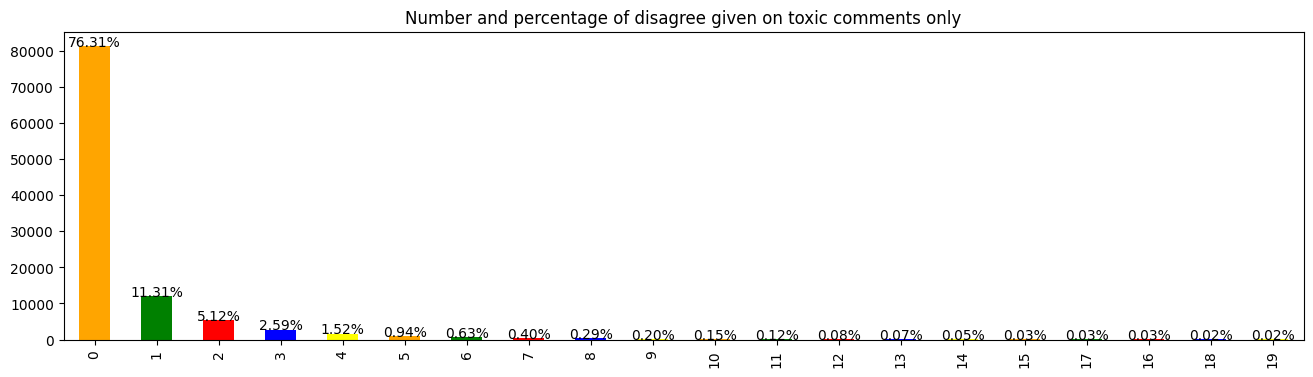

In [ ]:
plot_count('disagree','disagree given', train_df, 4)
plot_count('disagree', 'disagree given on toxic comments only', train_df[train_df['target'] > 0.5], 4)

### **Wordcloud of different comment_text features**

In [ ]:

stpwrds = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stpwrds,
        max_words=50,
        max_font_size=40,
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

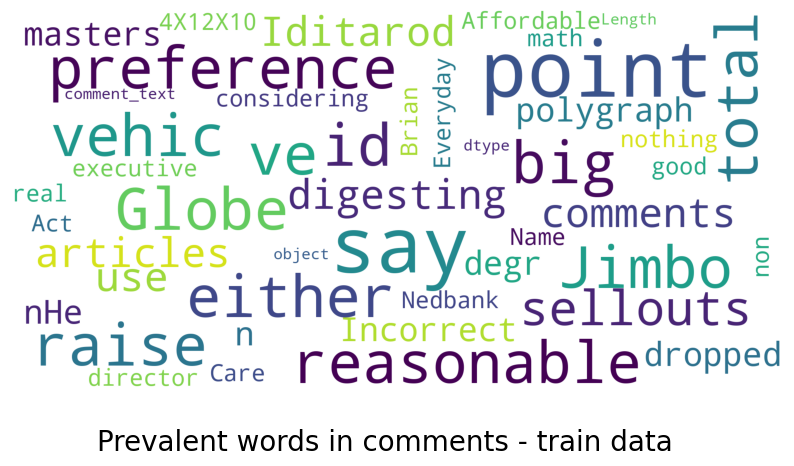

In [ ]:
show_wordcloud(train_df['comment_text'].sample(20000), title = 'Prevalent words in comments - train data')

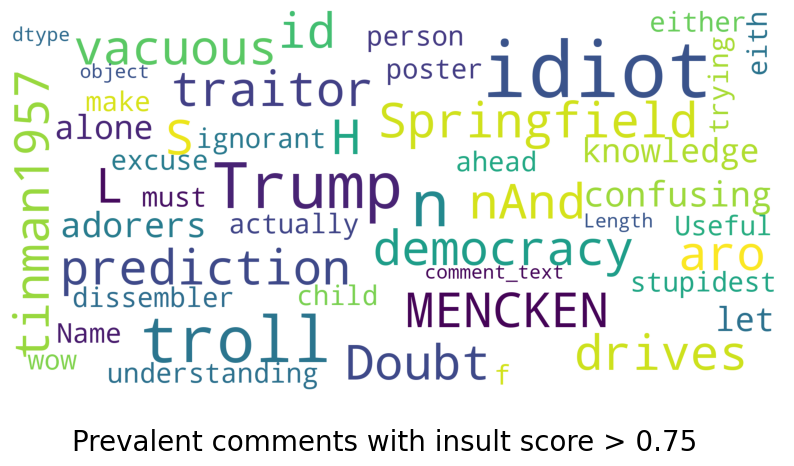

In [ ]:
show_wordcloud(train_df.loc[train_df['insult'] > 0.75]['comment_text'].sample(20000),
               title = 'Prevalent comments with insult score > 0.75')

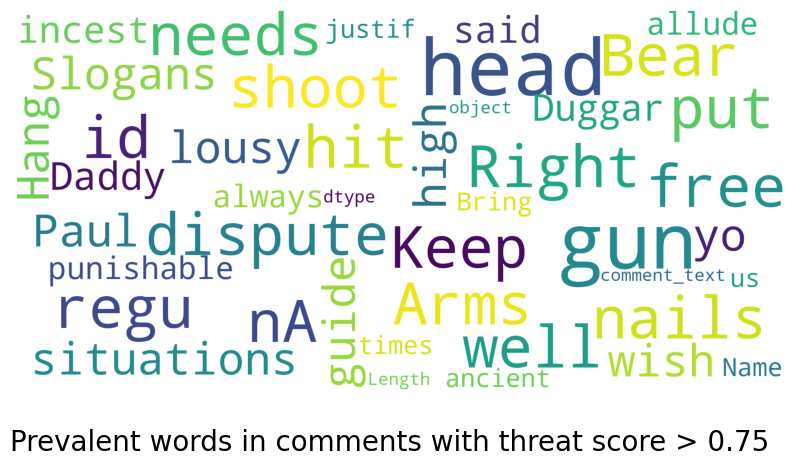

In [ ]:
show_wordcloud(train_df.loc[train_df['threat'] > 0.75]['comment_text'],
               title = 'Prevalent words in comments with threat score > 0.75')

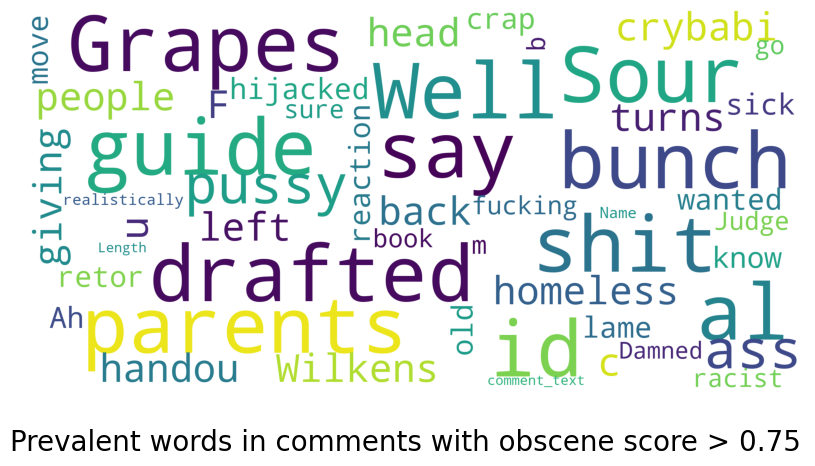

In [ ]:
show_wordcloud(train_df.loc[train_df['obscene'] > 0.75]['comment_text'],
               title = 'Prevalent words in comments with obscene score > 0.75')

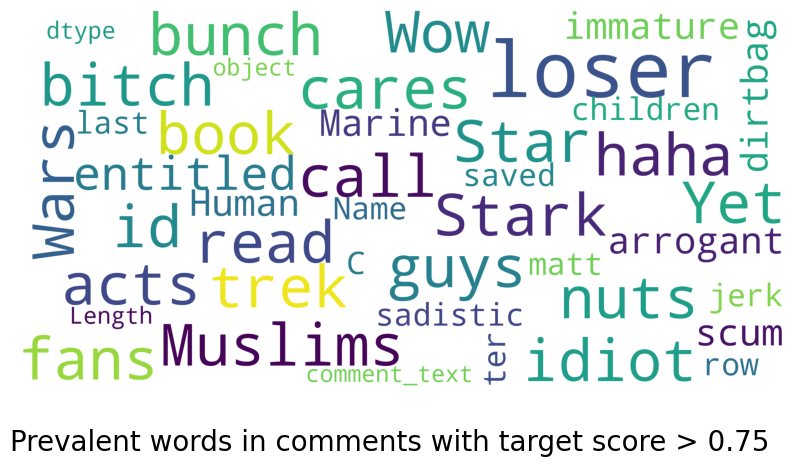

In [ ]:
show_wordcloud(train_df.loc[train_df['target'] > 0.75]['comment_text'],
               title = 'Prevalent words in comments with target score > 0.75')

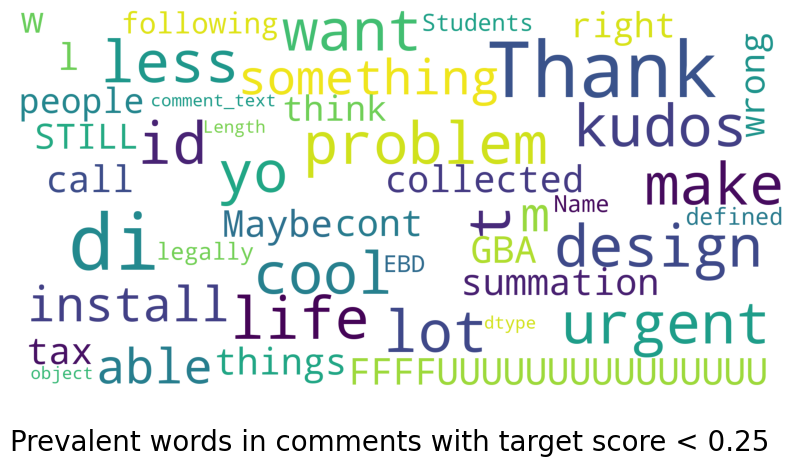

In [ ]:
show_wordcloud(train_df.loc[train_df['target'] < 0.25]['comment_text'],
               title = 'Prevalent words in comments with target score < 0.25')

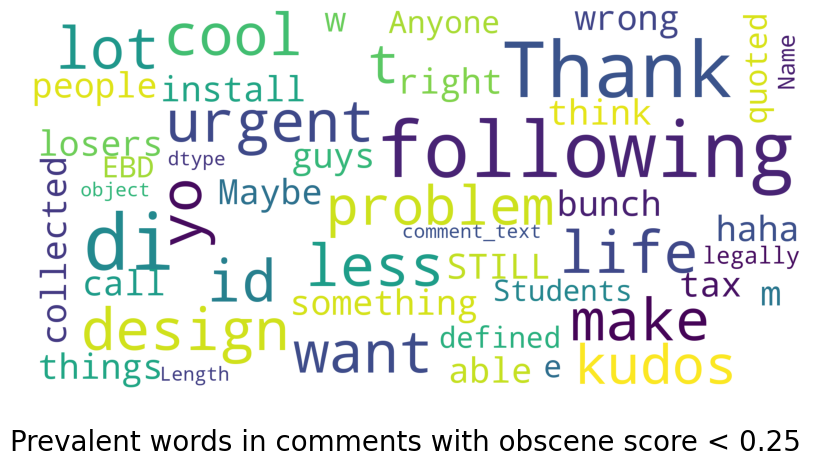

In [ ]:
show_wordcloud(train_df.loc[train_df['obscene']< 0.25]['comment_text'],
               title = 'Prevalent words in comments with obscene score < 0.25')

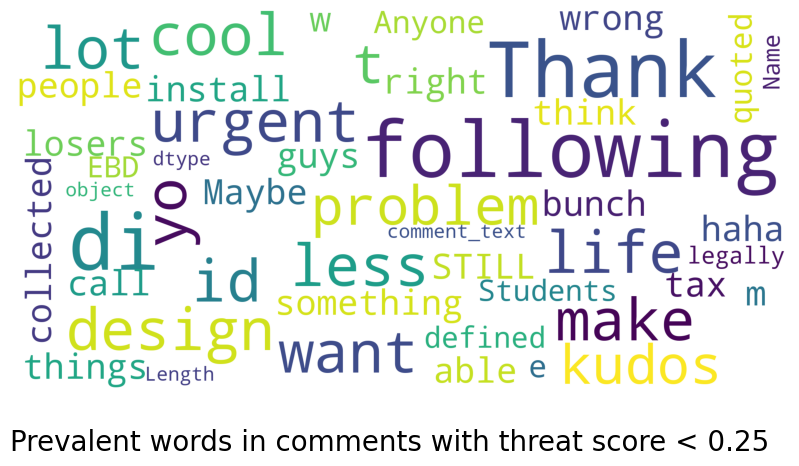

In [ ]:
show_wordcloud(train_df.loc[train_df['threat'] < 0.25]['comment_text'],
               title = 'Prevalent words in comments with threat score < 0.25')

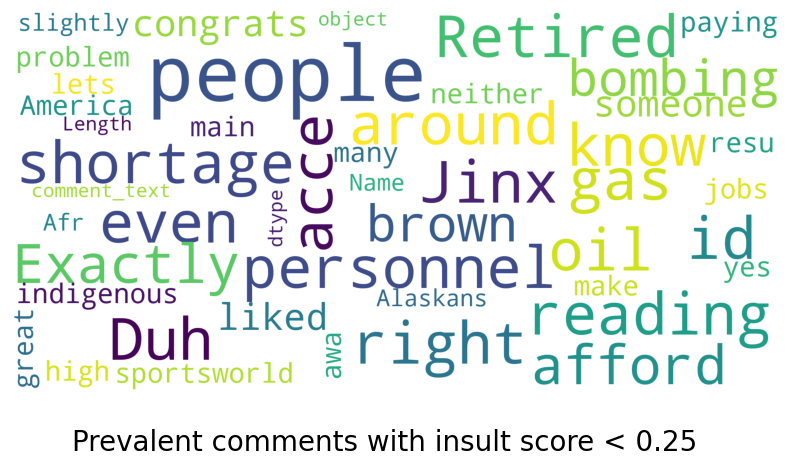

In [ ]:
show_wordcloud(train_df.loc[train_df['insult'] < 0.25]['comment_text'].sample(20000),
               title = 'Prevalent comments with insult score < 0.25')

## **Performing NLP:**

### **Processing Comment_text:**

In [ ]:
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
def preprocess(text_string):
    text_string = text_string.lower() # Convert everything to lower case.
    text_string = re.sub('[^A-Za-z0-9]+', ' ', text_string) # Remove special characters and punctuations

    x = text_string.split()
    new_text = []

    for word in x:
        if word not in stop_words:  # Removal of Stopwords
            new_text.append(stemmer.stem(word)) # Performing Stemming

    text_string = ' '.join(new_text)
    return text_string

In [ ]:
%%time
train_df['preprocessed_text'] = train_df['comment_text'].apply(preprocess)

CPU times: user 12min 51s, sys: 1.1 s, total: 12min 52s
Wall time: 12min 57s


In [ ]:
train_df.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,preprocessed_text
id,,,,,,,,,,,,,,,,,,,,,
59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,cool like would want mother read realli great ...
59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,thank would make life lot less anxieti induc k...
59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,urgent design problem kudo take impress
59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,someth abl instal site releas
59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.0,4,47,haha guy bunch loser


In [ ]:
%%time
test_df['preprocessed_text'] = test_df['comment_text'].apply(preprocess)

CPU times: user 40.4 s, sys: 62.6 ms, total: 40.5 s
Wall time: 40.7 s


### **Splitting Data into training and validation DF:**

In [ ]:
feature = train_df[['preprocessed_text']]
output = train_df[['target']]
X_train, X_cv, y_train, y_cv = train_test_split(feature, output)

print(X_train.shape)
print(X_cv.shape)
print(y_train.shape)
print(y_cv.shape)

(1353655, 1)
(451219, 1)
(1353655, 1)
(451219, 1)


In [ ]:
X_train.head()

,preprocessed_text
id,
501523,train servic dog handler anyon train boy dog
649776,sunni day adscam brow bag back sad see gullibl...
6283709,think trump good exampl make money primarili i...
5885130,complet agre use drive differ bus compani rtd ...
848735,note john ibbitson futur harper either


In [ ]:
X_cv.head()

,preprocessed_text
id,
395871,much innov could done 550 000 pilot plant make...
5364112,hawaii deleg recogn fact repeat fact ortiz liv...
5679141,care trump say talk boy
6064328,could wrong think reflect hindu belief
898049,peter roddi tpp would elimin tariff para 4 say...


In [ ]:
X_test = test_df[['preprocessed_text']]
X_test.head()

,preprocessed_text
id,
7097320,integr mean pay debt appli presid trump
7097321,malfeas administr board wast money
7097322,rmiller101 spoken like true elitist look bud a...
7097323,paul thank kind word inde strong belief hide b...
7097324,sorri miss high school eisenhow sent troop vie...


In [ ]:
# Saving the files to csv so that we dont need to preprocess again.
X_train.to_pickle('X_train.pkl')
X_cv.to_pickle('X_cv.pkl')
X_test.to_pickle('X_test.pkl')
y_train.to_pickle('y_train.pkl')
y_cv.to_pickle('y_cv.pkl')

In [ ]:
X_train = pd.read_pickle('X_train.pkl')
X_cv = pd.read_pickle('X_cv.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_cv = pd.read_pickle('y_cv.pkl')

## **Performing vectorization by using Bag Of Words(BOW):**

In [ ]:
cnt_vec = CountVectorizer(ngram_range=(1,2), max_features=30000)
bow_train = cnt_vec.fit_transform(X_train['preprocessed_text'])
bow_cv = cnt_vec.transform(X_cv['preprocessed_text'])
bow_test = cnt_vec.transform(X_test['preprocessed_text'])

print(bow_train.shape)
print(bow_cv.shape)
print(bow_test.shape)

(1353655, 30000)
(451219, 30000)
(97320, 30000)


## **Model Training using SGDRegressor:**

### **Hyperparameter Tuning:**

In [ ]:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")

        model = SGDRegressor(alpha=a, penalty=p)
        model.fit(bow_train, y_train) # Train

        preds = model.predict(bow_train) # Get predictions
        err = mean_squared_error(y_train['target'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)

        preds = model.predict(bow_cv) # Get predictions on CV set
        err = mean_squared_error(y_cv['target'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)

        if err < best_error: # Get best model trained
            best_error = err
            best_model = model

        print("*"*50)

1e-05 l1 :
Mean Squared Error on train set:  0.8260631556697494
Mean Squared Error on cv set:  0.04331483635928293
**************************************************
1e-05 l2 :
Mean Squared Error on train set:  0.35945988559164405
Mean Squared Error on cv set:  0.10614823558686587
**************************************************
0.0001 l1 :
Mean Squared Error on train set:  0.024470820612996852
Mean Squared Error on cv set:  0.02461552953290152
**************************************************
0.0001 l2 :
Mean Squared Error on train set:  0.697566822642106
Mean Squared Error on cv set:  0.04036508673073012
**************************************************
0.001 l1 :
Mean Squared Error on train set:  0.03139203916723636
Mean Squared Error on cv set:  0.031627317911661935
**************************************************
0.001 l2 :
Mean Squared Error on train set:  0.03935799655374909
Mean Squared Error on cv set:  0.023999743330588703
***********************************************

### **Plotting Hyperparameter vs MSE:**

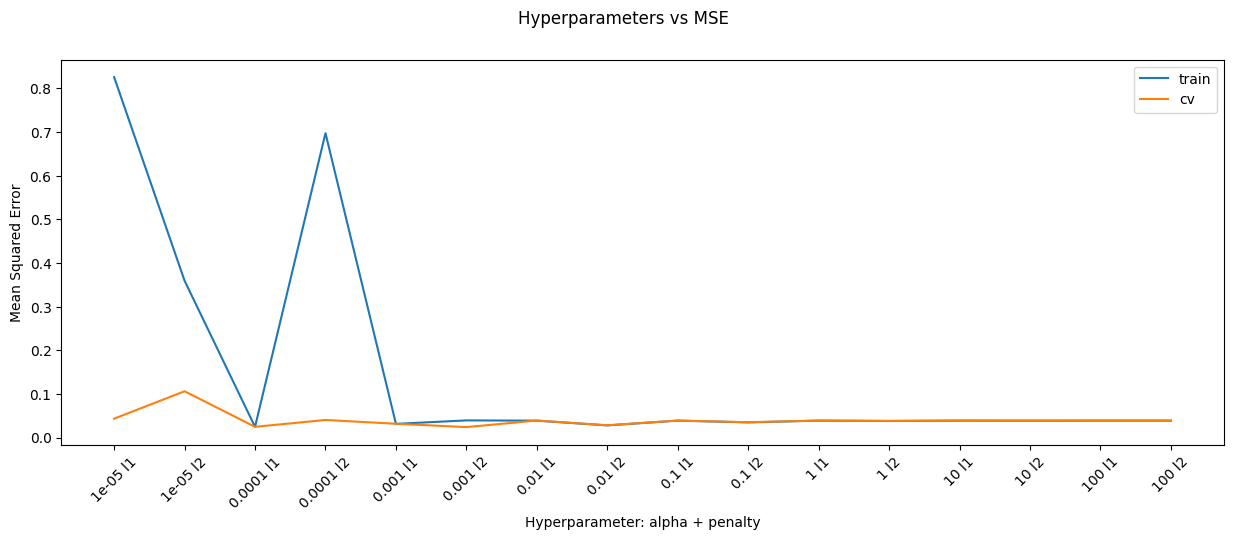

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(alpha) * len(penalty)), tr_errors)
plt.plot(range(len(alpha) * len(penalty)), cv_errors)
plt.legend(['train', 'cv'])
plt.xticks(range(len(alpha) * len(penalty)), xticks, rotation=45)
plt.xlabel('Hyperparameter: alpha + penalty')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
# Getting the best model parameters:
best_model.get_params()

{'alpha': 0.001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Printing the 20 most important features/words which contribute to a comment being toxic.
feat_names = cnt_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
great great,1.073771
idiot,0.384819
stupid,0.329875
pathet,0.244827
moron,0.236983
crap,0.222915
hypocrit,0.220984
dumb,0.219342
fool,0.192933
clown,0.192004


In [ ]:
# 20 most important features/words which contribute to comment being non-toxic.
df.sort_values("weights", ascending=True).iloc[0:20,:]

,weights
stupid stupid,-0.061655
great job,-0.033659
black white,-0.032944
america great,-0.031309
great articl,-0.027236
fool peopl,-0.025880
ignor fact,-0.025356
knee jerk,-0.023769
make america,-0.022631
black market,-0.022543


### **Making predictions on Training set using Best_model:**

In [ ]:
ans_train = best_model.predict(bow_train)

In [ ]:
y_train

,target
id,
501523,0.000000
649776,0.300000
6283709,0.000000
5885130,0.440000
848735,0.166667
...,...
5901032,0.000000
6252936,0.700000
6307891,0.100000


In [ ]:
ans_train = ['non-toxic' if i < 0.5 else 'toxic' for i in ans_train]
print(ans_train[:20])
y_train['target'] = ['non-toxic' if i < 0.5 else 'toxic' for i in y_train['target']]
print(y_train[:20])

['non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic']
            target
id                
501523   non-toxic
649776   non-toxic
6283709  non-toxic
5885130  non-toxic
848735   non-toxic
6070190  non-toxic
732441   non-toxic
5835958  non-toxic
5353908  non-toxic
5296296  non-toxic
5472044  non-toxic
5546533  non-toxic
6145893  non-toxic
557265   non-toxic
486665   non-toxic
5370009  non-toxic
881587   non-toxic
5875836  non-toxic
5152476  non-toxic
5777156  non-toxic


### **Model Evaluation Metrics:**

In [ ]:
confusion_matrix(y_train['target'],ans_train)

array([[1241340,    4274],
       [  93624,   14417]])

In [ ]:
print(classification_report(y_train['target'], ans_train))

              precision    recall  f1-score   support

   non-toxic       0.93      1.00      0.96   1245614
       toxic       0.77      0.13      0.23    108041

    accuracy                           0.93   1353655
   macro avg       0.85      0.57      0.59   1353655
weighted avg       0.92      0.93      0.90   1353655



### **Making Predictions on Test Dataset:**

In [ ]:
ans = best_model.predict(bow_test)


In [ ]:
ans = ['non-toxic' if i < 0.5 else 'toxic' for i in ans]
print(ans[:20])

['non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic', 'non-toxic']


In [ ]:
frequency = collections.Counter(ans)

print(dict(frequency))

{'non-toxic': 95984, 'toxic': 1336}


### **Creating Submission File:**

In [ ]:
#temp_df = pd.DataFrame(ans, columns=['target'])

In [ ]:
#temp_df

In [ ]:
#test_df["target"] = ans

In [ ]:
#test_df

In [ ]:
#test_df.to_csv('/content/drive/MyDrive/6thsemminiproject/answer.csv',index = False)

### **Making Predictions on live data:**

In [ ]:
while True:
    text = input("\nEnter a sentence: ")
    prep_text = preprocess(text)
    arr = np.array([[prep_text]],dtype='str')

    df = pd.DataFrame(arr, columns =['number'])

    score = best_model.predict(cnt_vec.transform(df['number']))

    pred_class = None

    if score[0] > 0.5:
      pred_class = "Toxic"
    elif score[0] > 0.25 and score[0] < 0.5:
      pred_class = "Mildly Toxic"
    else:
      pred_class = "Non - Toxic"

    print(f"Preprocessed text: {prep_text}\nScore: {score[0]}\nResult: {pred_class}\n")

    if input("Do you want to continue ? (y/n) ").lower() == "n":
        break

Preprocessed text: gay woman
Score: 0.1785080875021665
Result: Non - Toxic

Preprocessed text: build wall
Score: 0.07959176062808243
Result: Non - Toxic

